In [1]:
import matplotlib
import math 
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time

In [2]:
%matplotlib widget

In [3]:
#Utils

#Computes the distance to the center (which is at (0.5, 0.5))
def dist_center(x, y):
    dist = math.sqrt((x-0.5)**2 + (y-0.5)**2)
    print(dist)
    return dist

#Computes the location at which the opponent will move their store
def update_opponent(x,y,factor):
    d_c = dist_center(x,y)
    x_rel = x-0.5
    y_rel = y-0.5
    
    sgn = -1 if x_rel > 0 else 1
    
    alpha = math.atan(y_rel/x_rel)
    upd_x = x_rel+math.cos(alpha)*sgn*factor
    upd_y = y_rel+math.sin(alpha)*sgn*factor
    return upd_x+0.5, upd_y+0.5

#Changes the store which is currently being modified by the user
def change_store(self):
    change_store.counter += 1
    change_store.counter = change_store.counter%2
    print(change_store.counter)
    
change_store.counter = 0

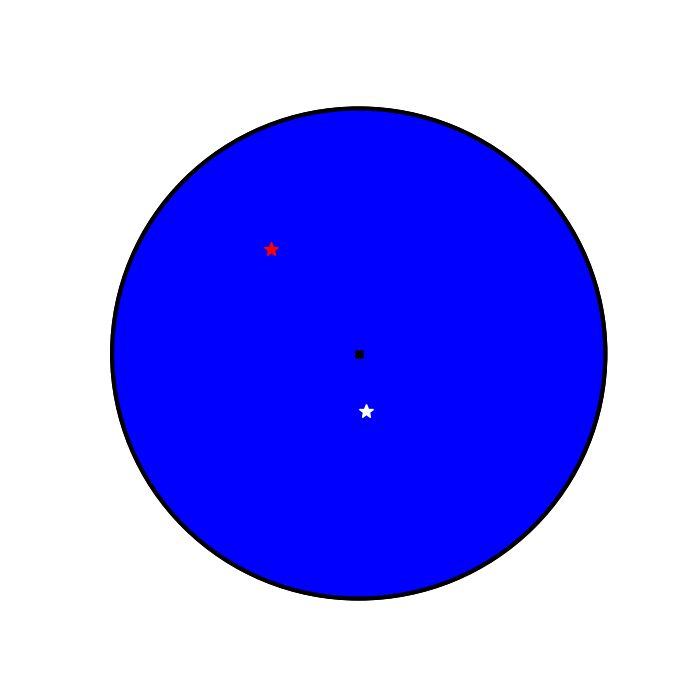

Button(button_style='danger', description='Change Store', icon='check', style=ButtonStyle(), tooltip='Click me…

In [5]:
plt.ioff();
fig = plt.figure(num='Nash City', figsize=(7,7))
ax = fig.gca()
plt.axis('off')
circle = matplotlib.patches.Circle((0.5, 0.5), radius=0.5, facecolor='blue' ,edgecolor="black", linewidth=3)
ax.add_patch(circle)
plt.plot(0.5, 0.5, 'X', color='black')

shop1_location = plt.plot(0.5, 0.5, 'X', color='black')
shop2_location = plt.plot(0.5, 0.5, 'X', color='black')


def onclick(event):
    if(dist_center(event.xdata, event.ydata)<=0.5):
        if(change_store.counter == 1):
            shop1_location.pop(0).remove()
            shop1_location.append(plt.plot(event.xdata, event.ydata, '*', color='white', ms=10)[0])
        elif(change_store.counter == 0):
            shop2_location.pop(0).remove()
            shop2_location.append(plt.plot(event.xdata, event.ydata, '*', color='red', ms=10)[0])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.ion()

change_store_button = widgets.Button(
    description='Change Store',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

change_store_button.on_click(change_store)

display(fig.canvas, change_store_button)